### application 데이터 세트에 다양한 feature engineering 수행. 
* application_train(test) 주요 feature값들의 분포도등의 EDA 수행. 
* application_train(test) 주요 feature 들의 추가적인 가공을 통한 feature engineering 수행. 

#### 라이브러리와 app 데이터 세트 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc,os,sys
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc, os, sys
import random
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

##### 코랩 버전은 Google Drive에서 데이터 세트를 로딩

In [2]:
import os, sys
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#### 코랩 버전은 아래와 같이 절대 경로로 디렉토리 변경. 
default_dir = "/content/gdrive/My Drive"

app_train = pd.read_csv(os.path.join(default_dir, "application_train.csv"))
app_test = pd.read_csv(os.path.join(default_dir, "application_test.csv"))

In [4]:
# 널값의 갯수
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [5]:
# TARGET의 분포 비율 (연체, 정상)
app_train['TARGET'].value_counts() / app_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


#### 연속형 숫자 feature들에 대해서 TARGET값이 각각 0과 1일때의 Histogram 시각화
* violinplot과 distplot으로 숫자형 feature들에 대해 TARGET값 별 분포도 비교 시각화
* 0과 1일때의 데이터들은 어떻게 달라지는지 보고 싶은것.

In [13]:
def show_hist_by_target(df, columns):
  cond_1 = (df['TARGET'] == 1)
  cond_0 = (df['TARGET'] == 0)

  for column in columns:
    fig, axs = plt.subplots(figsize = (12, 4), nrows = 1, ncols= 2, squeeze = False)
    sns.violinplot(x = 'TARGET', data = df, ax = axs[0][0])
    sns.distplot(df[cond_1][column], label = '1', color = 'red' , ax = axs[0][1])
    sns.distplot(df[cond_0][column], label = '0', color = 'blue', ax = axs[0][1])    

In [16]:
column_cond1 = app_train.dtypes[app_train.dtypes != 'object'].index.to_list()
column_cond1

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

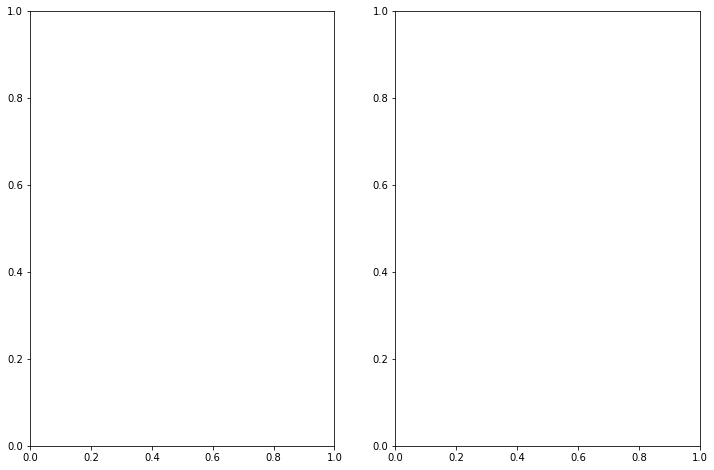

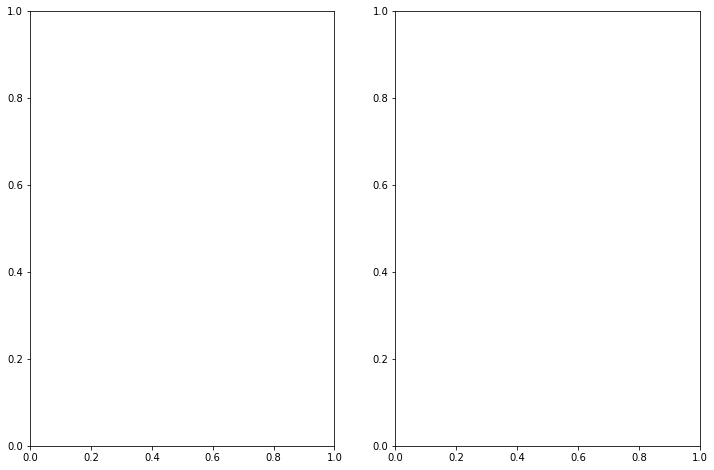

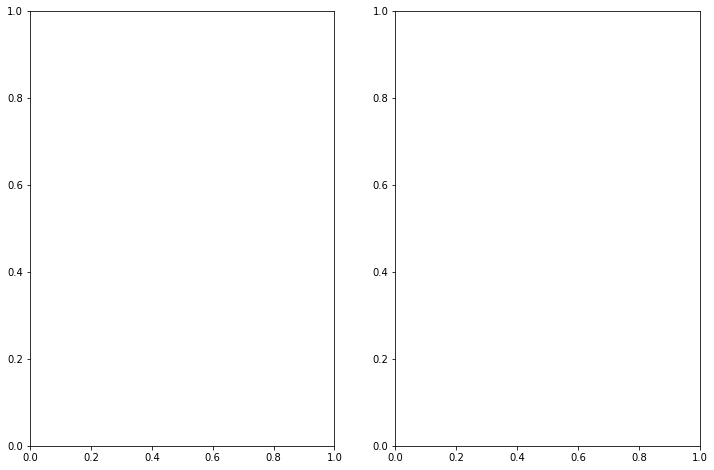

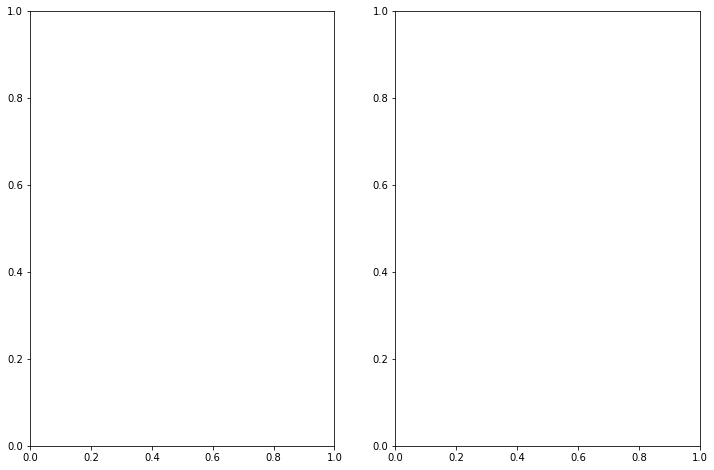

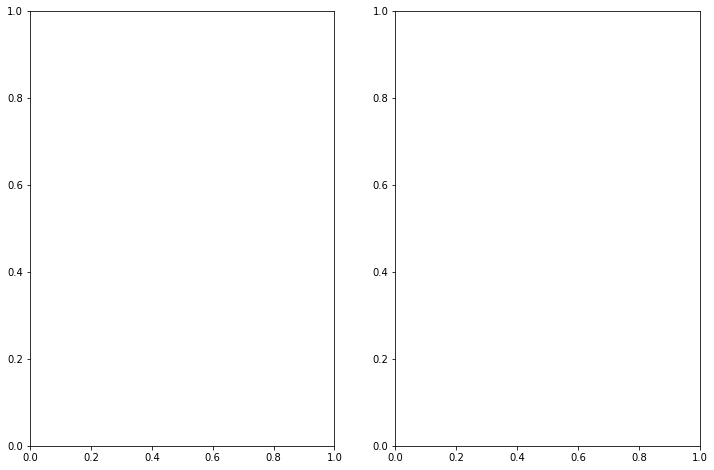

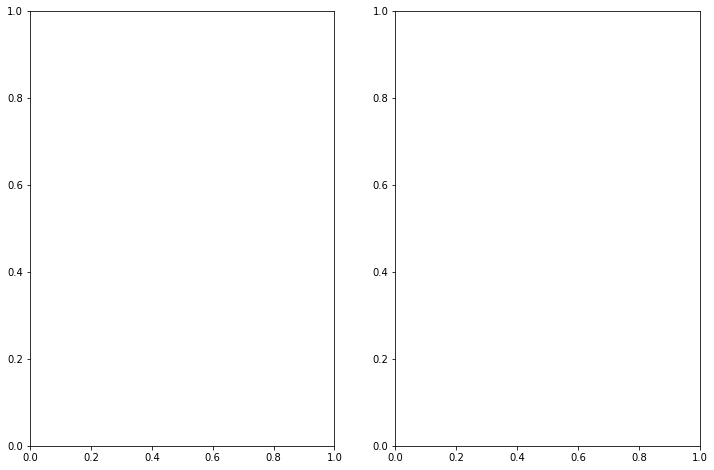

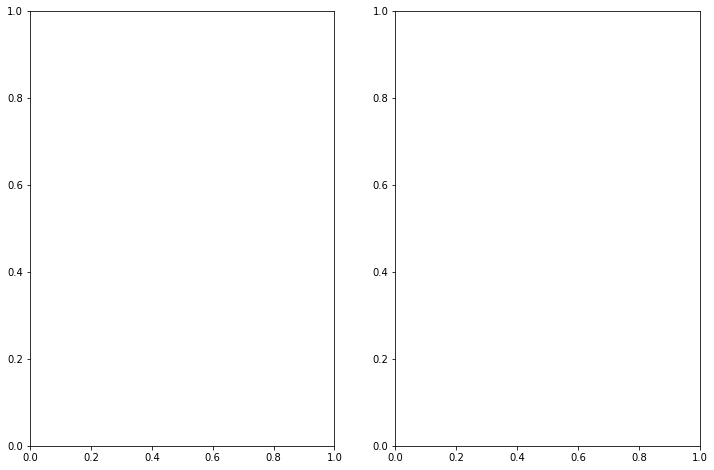

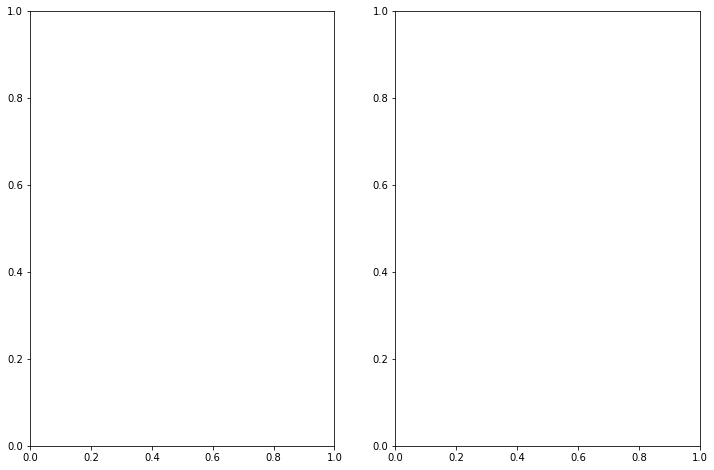

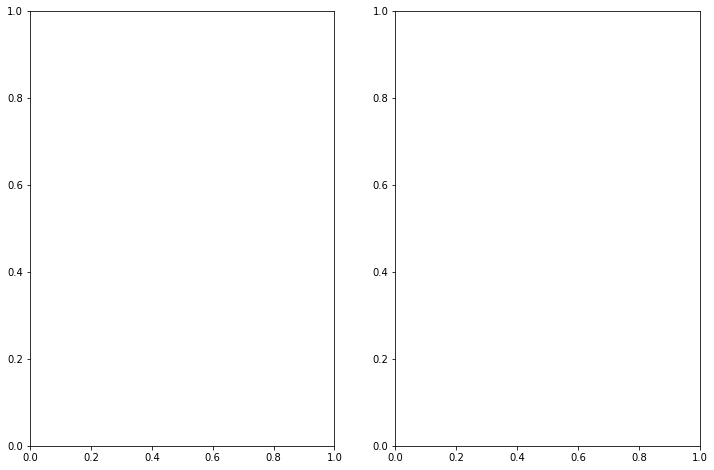

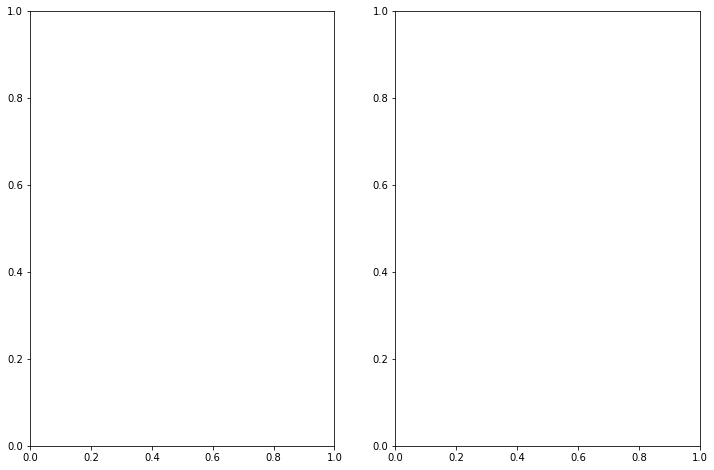

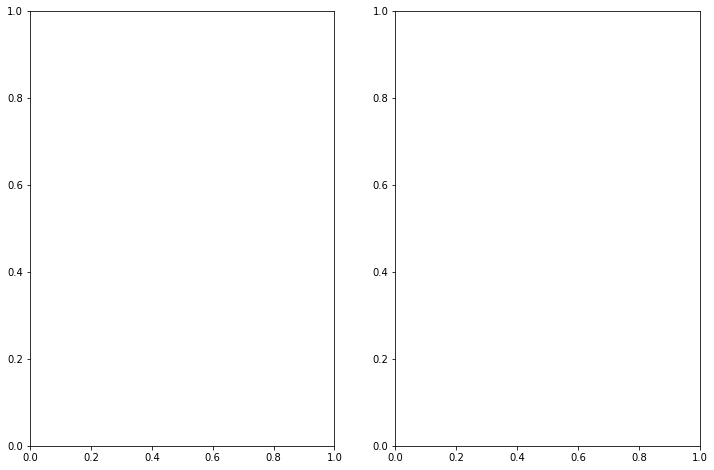

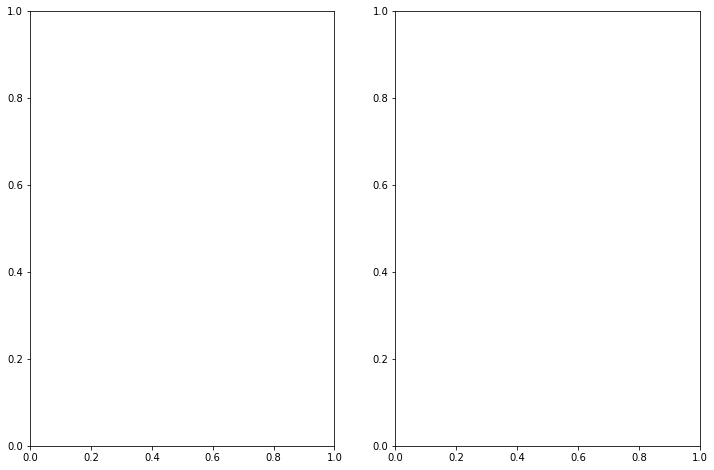

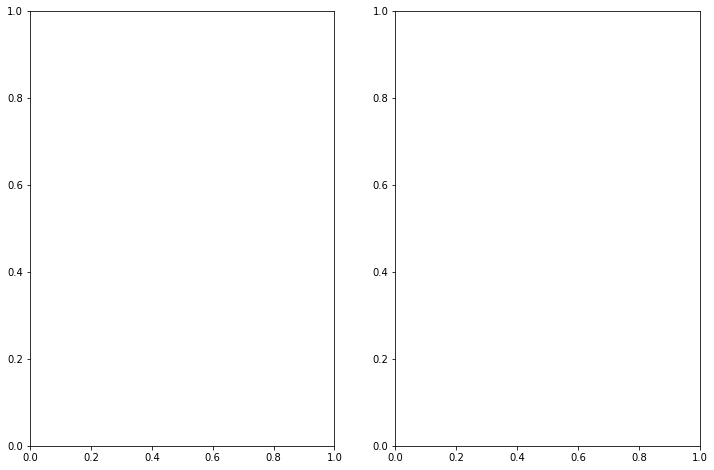

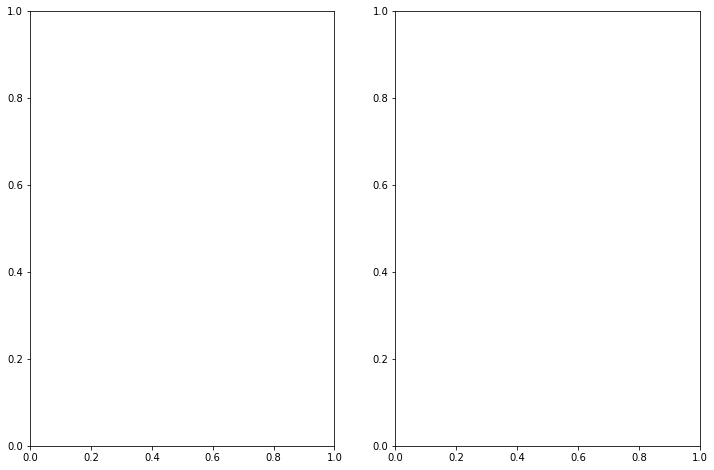

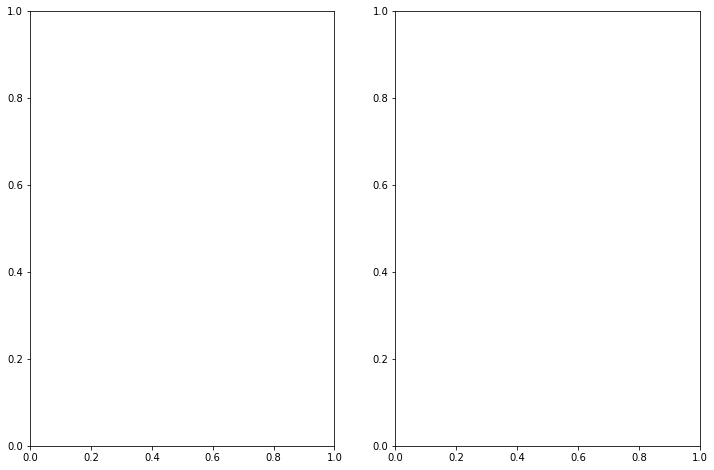

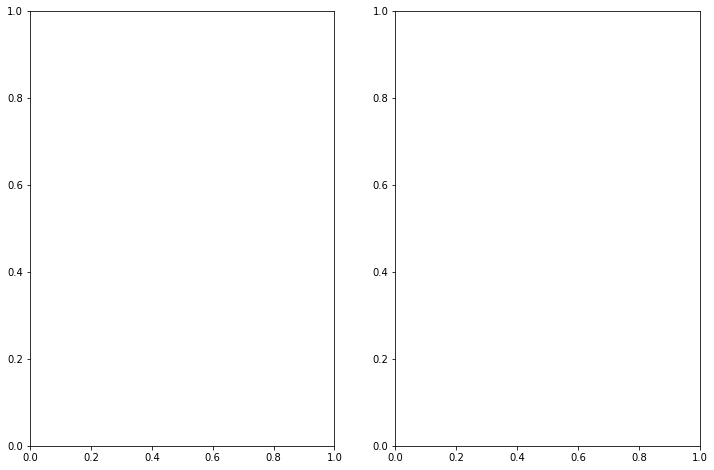

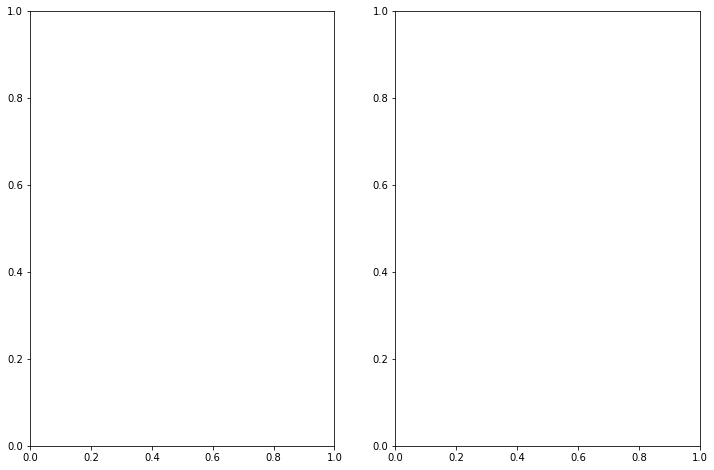

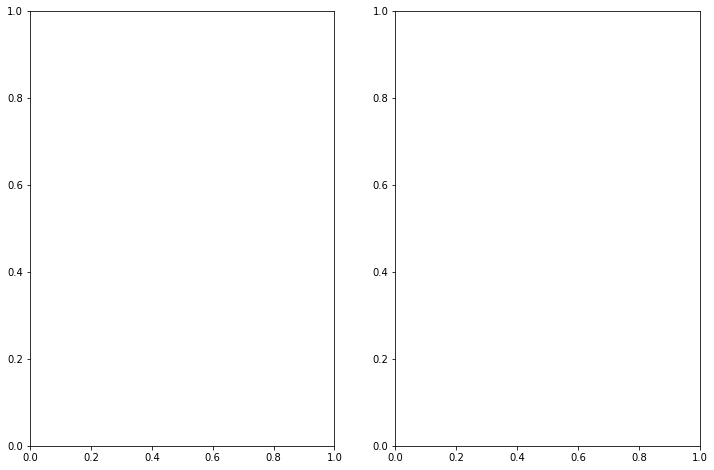

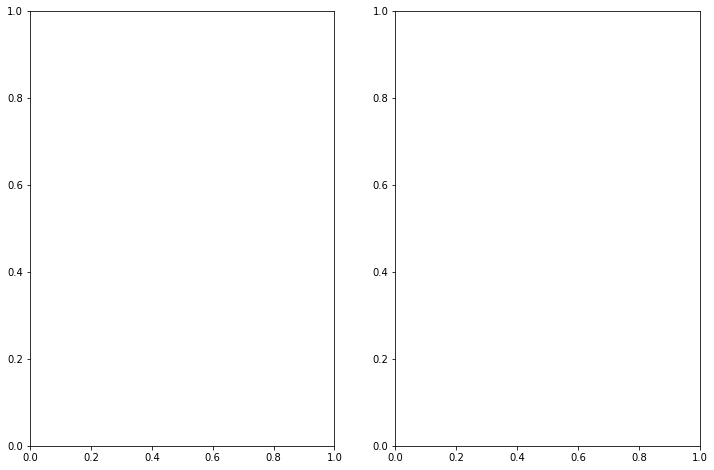

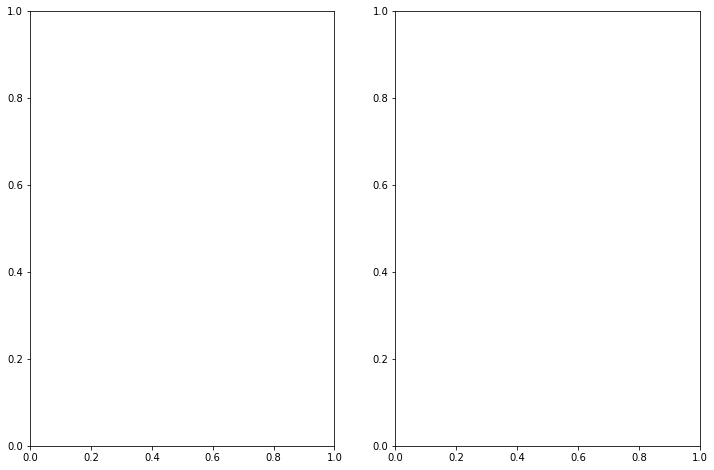

In [11]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

show_hist_by_target(app_train, columns)

- AMT_INCOME_TOTAL, AMT_CREDIT은 크게 차이가 없음
- AMT_ANNUITY(월대출지급액)는 TARGET=1시 상대적으로 작은 숫자대의 값이 조금 많음.
- AMT_GOODS_PRICE(소비자대출상품액)는 크게 차이가 없음
- DAYS_BIRTH는 TARGET=1시 적은 연령대의 숫자값이 상대적으로 많음.(신청일자 기준으로 나이 환산)
- DAYS_EMPLOYED는 TARGET=1시 작은 값들이 조금 더 많음.(대출신청전 현직업 유지기간)
- DAYS_ID_PUBLISH(신원증명서 , DAYS_REGISTRATION는 TARGET = 1시 최근 값들이 더 많음.
_ DAYS_LAST_PHONE_CHANGE는 큰 차이가 없음
- CNT_FAM_MEMBERS(가족수)는 차이가 없음.
- REGIN_RATING_CLIENT(거주지역 평가)는 큰 차이가 없음
- EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE 모두 조금씩 차이가 있음.
- 나머지 컬럼 모두 큰 차이가 없음
- 전반적으로 연령대가 낮은(직장 경력이 적은), 소액 대출에서 상대적으로 연체 비중이 높음


#### seaborn의 countplot() 또는 catplot()을 이용하여 category 피처(object 컬럼)을 TARGET 유형에 따라 Count 비교
* 카테고리형 컬럼은 countplot() 혹은 catplot()을 사용.
* 연속형 변수는 distplot()를 이용해 분포도를 시각화

In [ ]:
object_columns = app_train.dtypes[app_train.dtypes == 'object'].index.to_list()

Column name  NAME_CONTRACT_TYPE
Column name  CODE_GENDER
Column name  FLAG_OWN_CAR
Column name  FLAG_OWN_REALTY
Column name  NAME_TYPE_SUITE
Column name  NAME_INCOME_TYPE
Column name  NAME_EDUCATION_TYPE
Column name  NAME_FAMILY_STATUS
Column name  NAME_HOUSING_TYPE
Column name  OCCUPATION_TYPE
Column name  WEEKDAY_APPR_PROCESS_START
Column name  ORGANIZATION_TYPE
Column name  FONDKAPREMONT_MODE
Column name  HOUSETYPE_MODE
Column name  WALLSMATERIAL_MODE
Column name  EMERGENCYSTATE_MODE


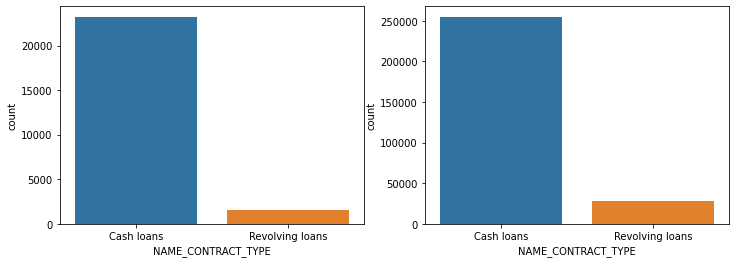

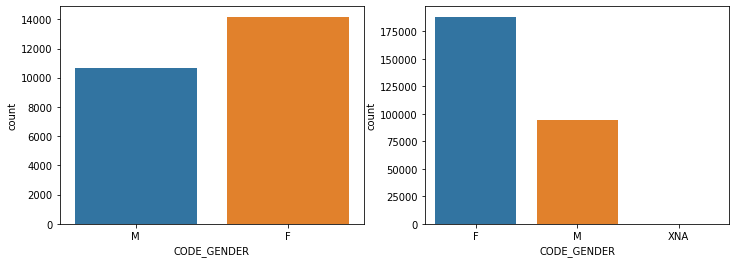

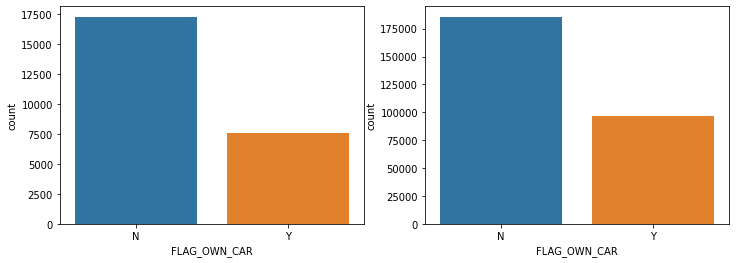

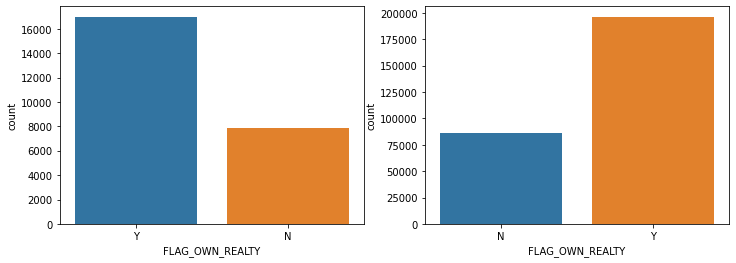

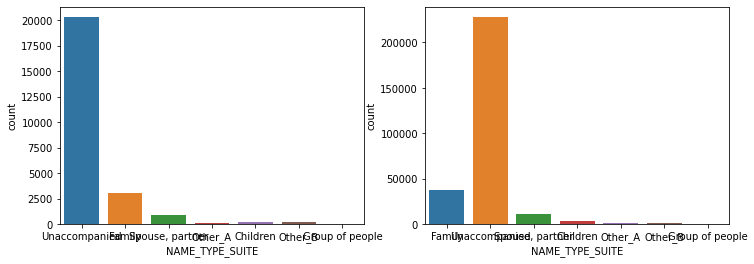

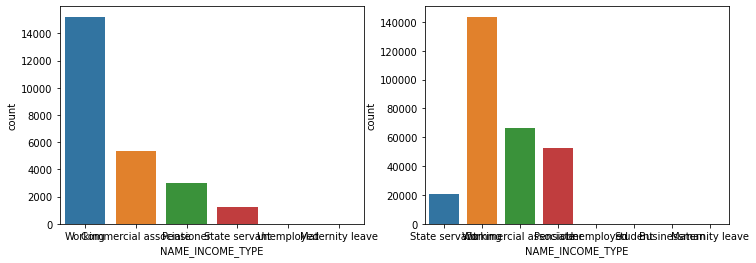

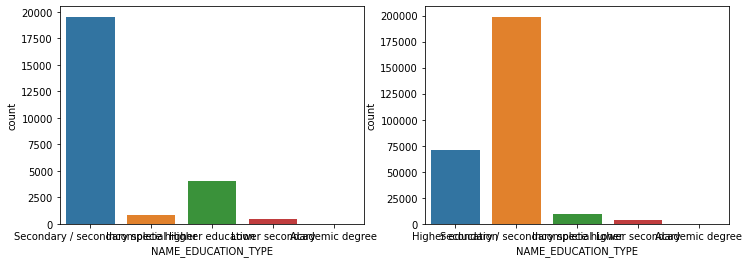

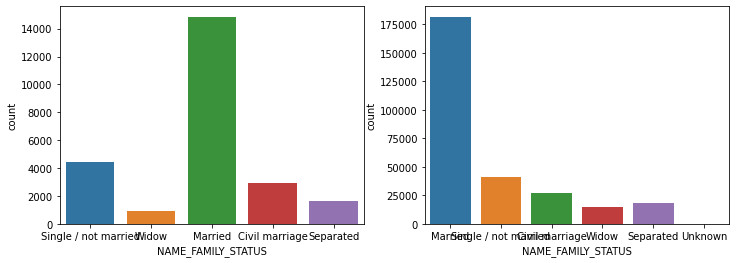

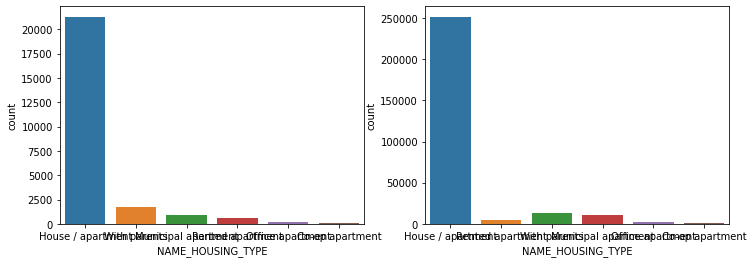

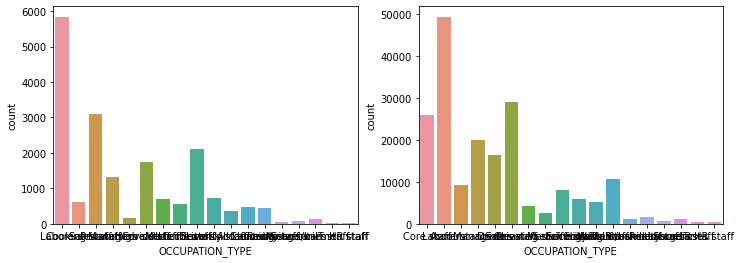

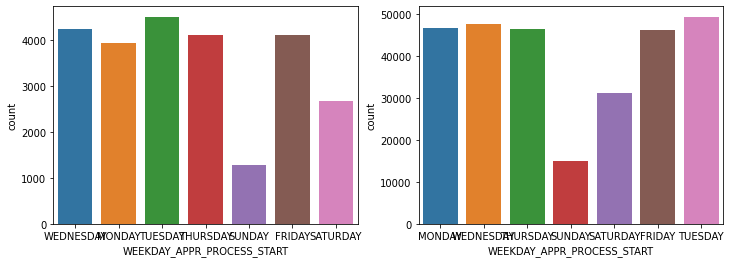

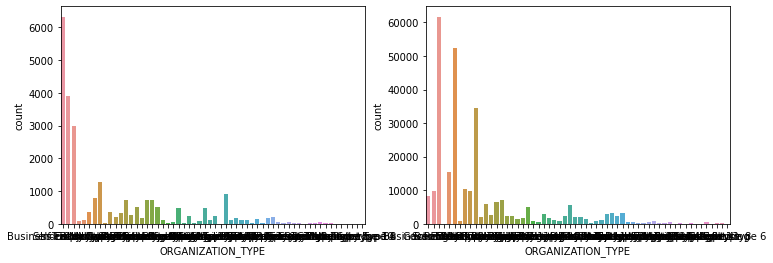

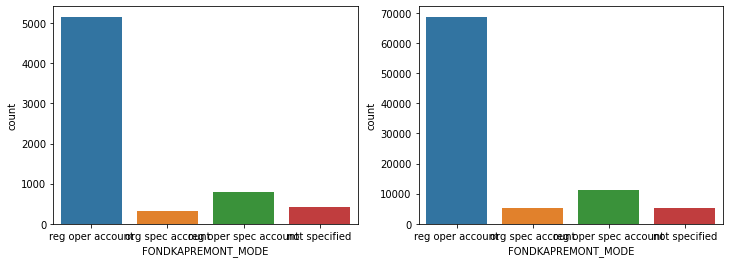

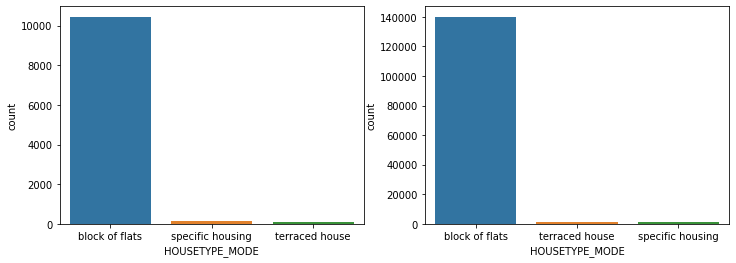

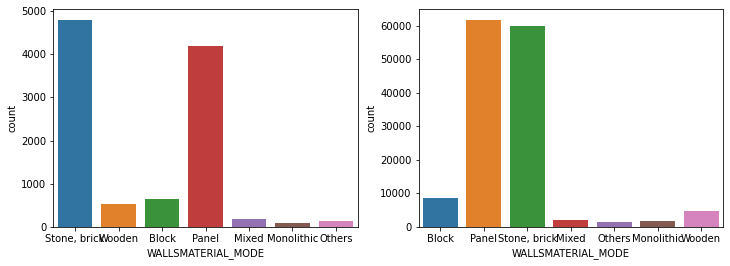

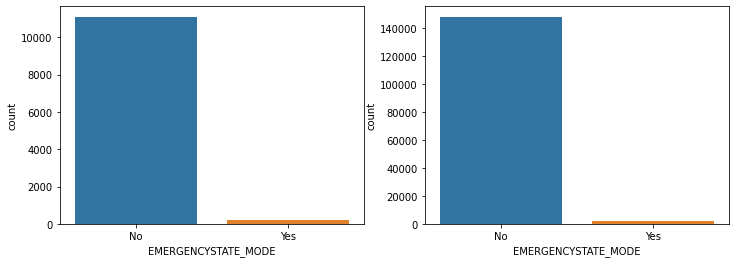

In [ ]:
def show_count_by_target(df, columns):
  cond_1 = (df['TARGET']== 1)
  cond_0 = (df['TARGET'] == 0)

  for column in columns:
    print("Column name ", column)
    fig, axs = plt.subplots(figsize = (12, 4), nrows = 1, ncols= 2, squeeze = False)
    sns.countplot(df[cond_1][column], ax = axs[0][0])
    sns.countplot(df[cond_0][column], ax = axs[0][1])

show_count_by_target(app_train, object_columns)

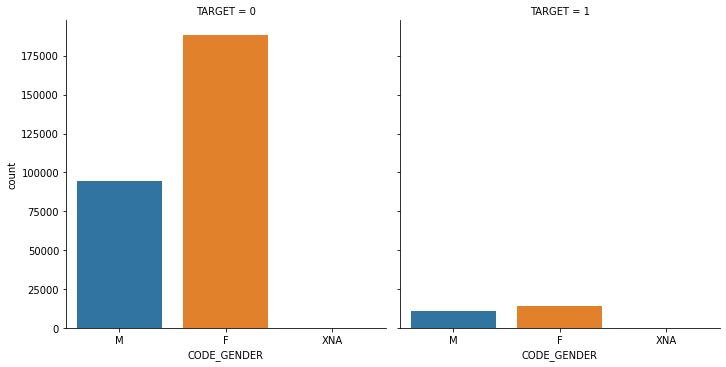

In [ ]:
# subplot두개가 만들어진다.
sns.catplot(x = 'CODE_GENDER',data = app_train, col = 'TARGET', kind = 'count')  

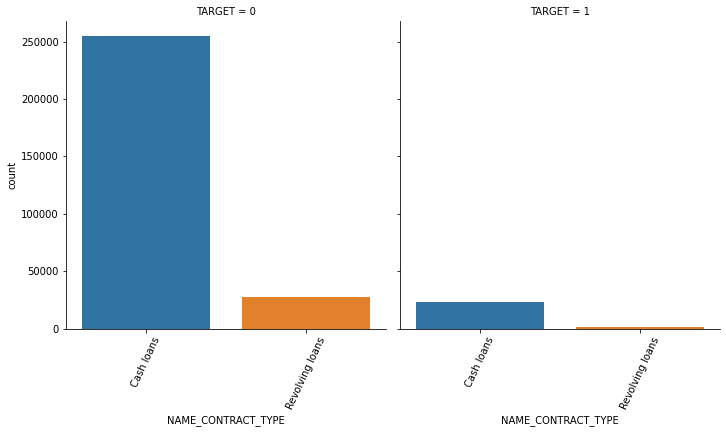

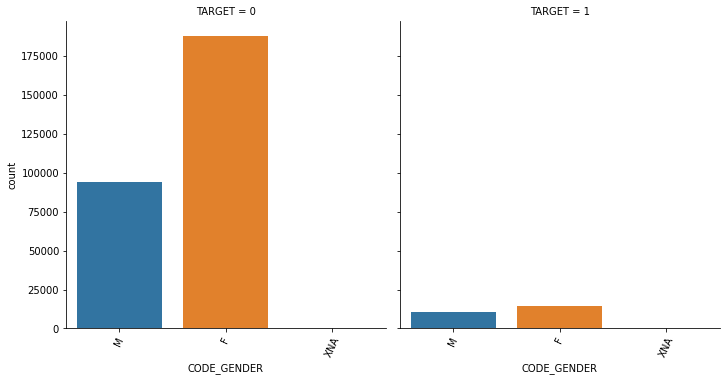

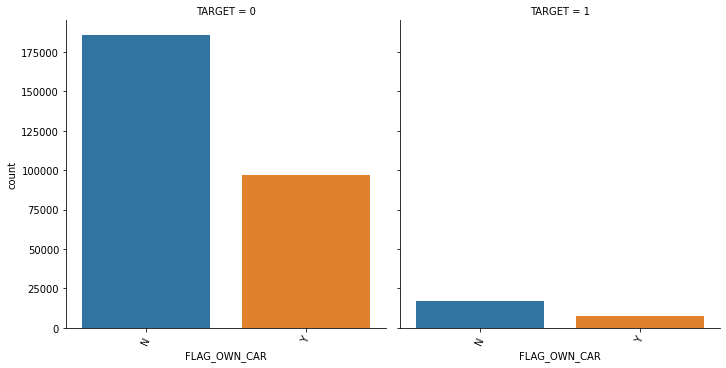

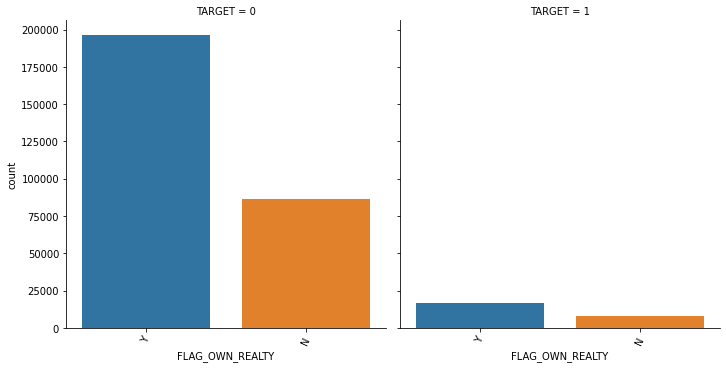

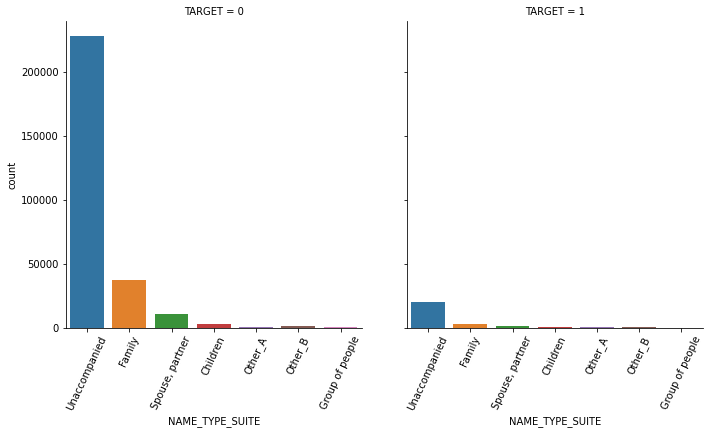

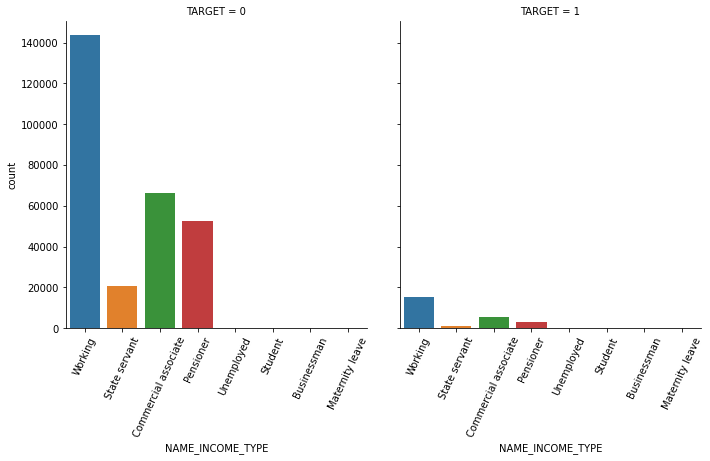

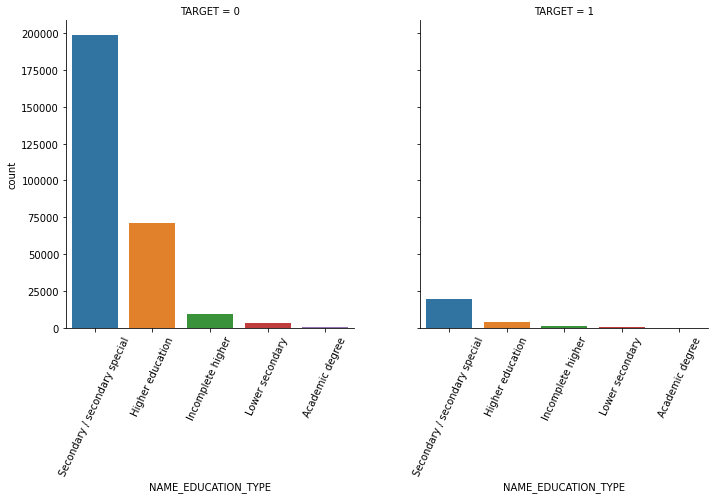

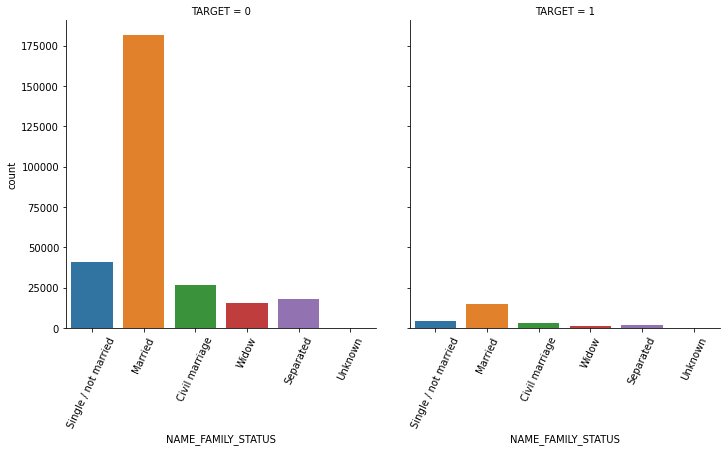

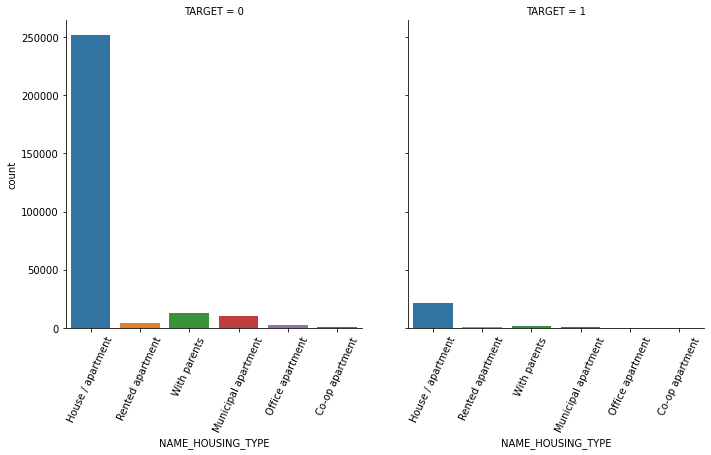

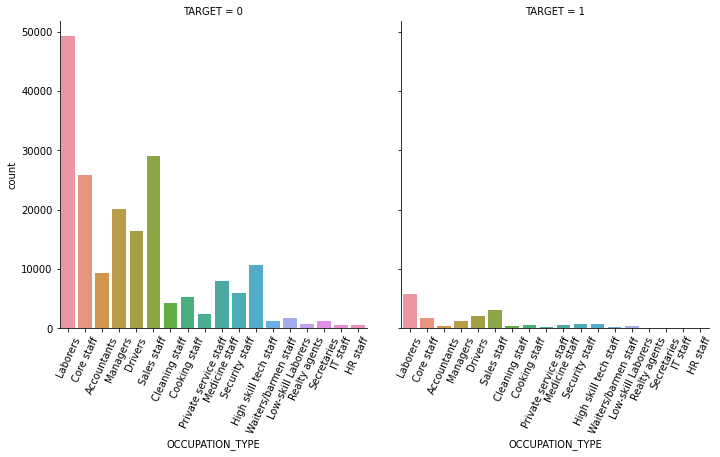

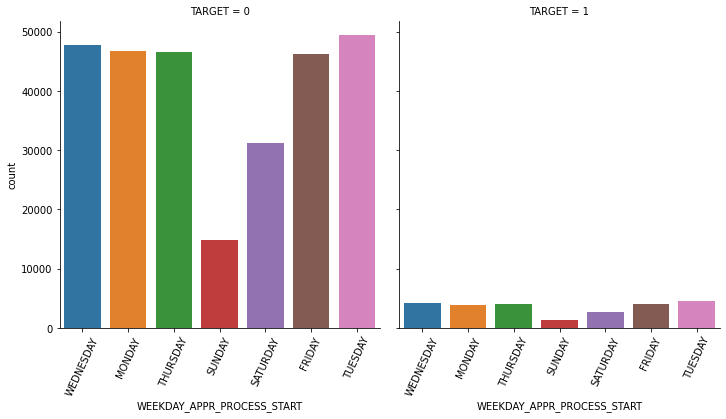

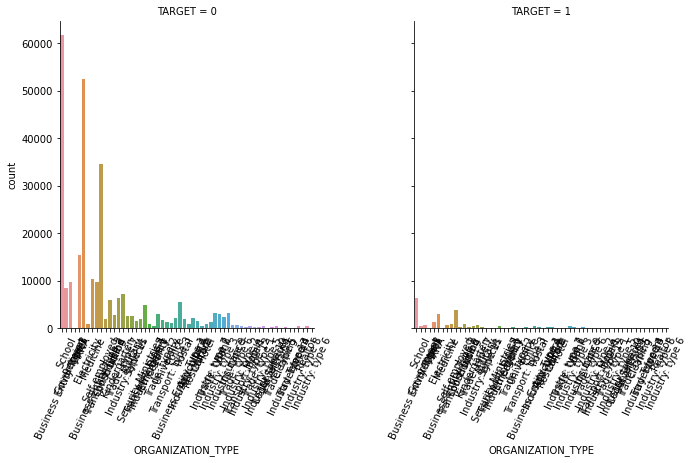

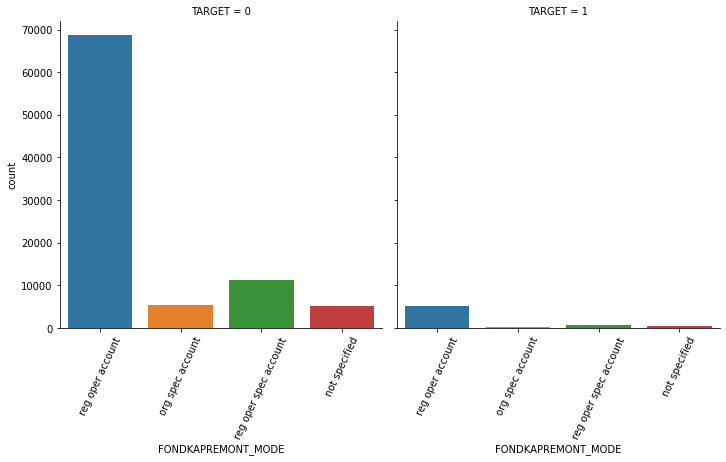

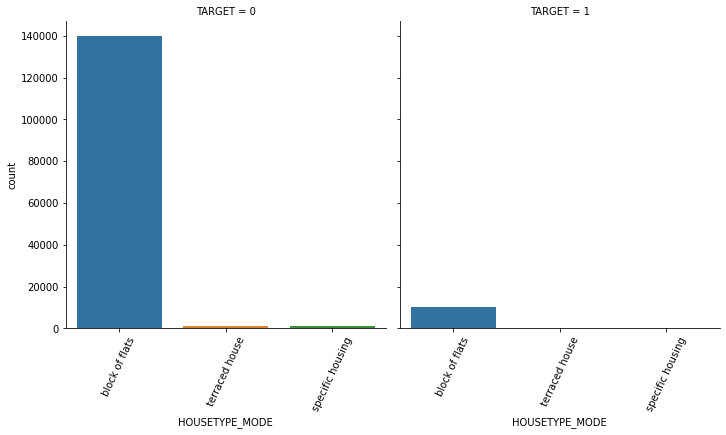

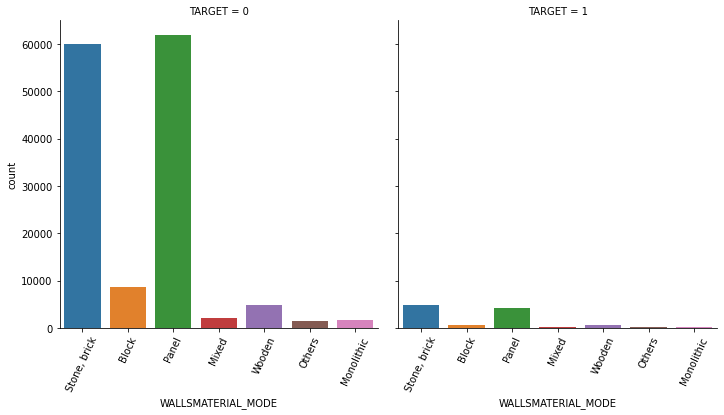

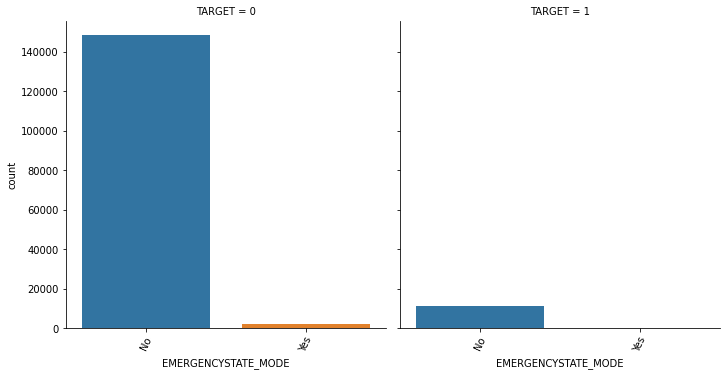

In [ ]:
def show_category_by_target(df, columns):
  for column in columns:
    chart = sns.catplot(x = column, col = 'TARGET', data = app_train,  kind = 'count')
    chart.set_xticklabels(rotation = 65)

show_category_by_target(app_train, object_columns)

#### 대출 횟수 대비 연체 비율이 남성이 여성보다 높음. 이를 value_counts()로 확인. 

In [ ]:
cond_1 = app_train['TARGET'] == 1   # 연체 
cond_0 = app_train['TARGET'] == 0   # 정상
# 전체 건수 대비 남성과 여성의 비율 확인
print(app_train['CODE_GENDER'].value_counts() / app_train.shape[0])

# TARGET=1 일 경우 남성과 여성의 비율 확인
print(app_train[cond_1]["CODE_GENDER"].value_counts() / app_train[cond_1].shape[0])
# TARGET=0 일 경우 남성과 여성의 비율 확인
print(app_train[cond_0]["CODE_GENDER"].value_counts() / app_train[cond_0].shape[0])

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64
F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64
F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


In [ ]:
app_train.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### 주요 컬럼들의 target과의 상관도 분석

In [ ]:
corr_columns = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'DAYS_EMPLOYED','DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL', 'TARGET']
col_corr = app_train[corr_columns].corr()
col_corr

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,TARGET
EXT_SOURCE_1,1.000000,0.213982,0.186846,-0.600610,0.168429,0.119398,0.175502,0.289848,-0.132375,-0.181095,-0.132607,0.026232,-0.155317
EXT_SOURCE_2,0.213982,1.000000,0.109167,-0.091996,0.131228,0.125804,0.139367,-0.020767,-0.050955,-0.059913,-0.195764,0.060925,-0.160472
EXT_SOURCE_3,0.186846,0.109167,1.000000,-0.205478,0.043516,0.030752,0.047717,0.113434,-0.131597,-0.107549,-0.075256,-0.030229,-0.178919
DAYS_BIRTH,-0.600610,-0.091996,-0.205478,1.000000,-0.055436,0.009445,-0.053442,-0.615864,0.272691,0.331912,0.082939,0.027261,0.078239
AMT_CREDIT,0.168429,0.131228,0.043516,-0.055436,1.000000,0.770138,0.986968,-0.066838,-0.006575,0.009621,-0.073701,0.156870,-0.030369
AMT_ANNUITY,0.119398,0.125804,0.030752,0.009445,0.770138,1.000000,0.775109,-0.104332,0.011268,0.038514,-0.063747,0.191657,-0.012817
AMT_GOODS_PRICE,0.175502,0.139367,0.047717,-0.053442,0.986968,0.775109,1.000000,-0.064842,-0.009267,0.011565,-0.076313,0.159610,-0.039645
DAYS_EMPLOYED,0.289848,-0.020767,0.113434,-0.615864,-0.066838,-0.104332,-0.064842,1.000000,-0.272378,-0.210242,0.023032,-0.064223,-0.044932
DAYS_ID_PUBLISH,-0.132375,-0.050955,-0.131597,0.272691,-0.006575,0.011268,-0.009267,-0.272378,1.000000,0.101896,0.088576,0.008506,0.051457
DAYS_REGISTRATION,-0.181095,-0.059913,-0.107549,0.331912,0.009621,0.038514,0.011565,-0.210242,0.101896,1.000000,0.056983,0.027805,0.041975


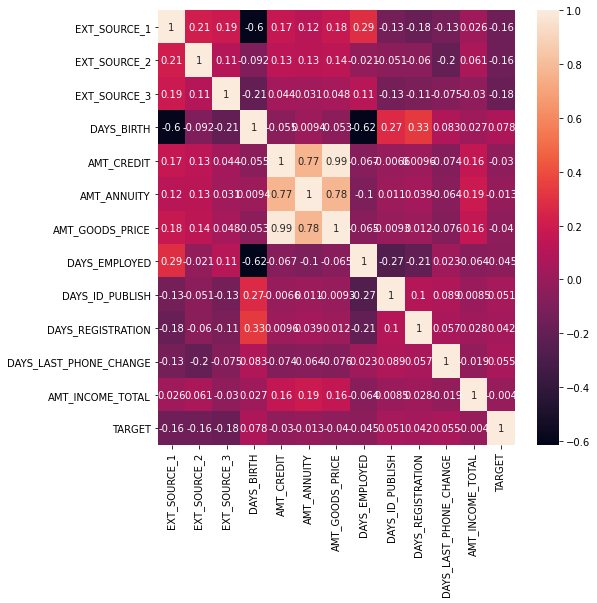

In [ ]:
plt.figure(figsize = (8, 8))
sns.heatmap(col_corr, annot = True)

#### 이상치 데이터 확인 및 DAYS_EMPLOYED 이상치 값 변경 

In [ ]:
app_train['DAYS_EMPLOYED'].value_counts()  # 널처리 할것임, 365243인 값

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [ ]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)
# dropna옵션값은 기본값이 True로 NaN값이 기본적으로 제외되므로 
# False로 해서 몇건인지 확인해보고자 하는것.
app_train['DAYS_EMPLOYED'].value_counts(dropna = False)  

 NaN        55374
-200.0        156
-224.0        152
-199.0        151
-230.0        151
            ...  
-8868.0         1
-13006.0        1
-10261.0        1
-14079.0        1
-9062.0         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

### 주요 Feature들에 대한 feature engineering 수행

#### EXT_SOURCE 계열값 확인, EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인 
* 널값까지 포함한 분포도 확인

In [ ]:
app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].isnull().sum()

EXT_SOURCE_1    173378
EXT_SOURCE_2       660
EXT_SOURCE_3     60965
dtype: int64

In [ ]:
app_train['EXT_SOURCE_1'].value_counts(dropna=False)

NaN         173378
0.546426         5
0.598469         5
0.499002         5
0.605152         5
             ...  
0.381263         1
0.259241         1
0.116346         1
0.171978         1
0.844540         1
Name: EXT_SOURCE_1, Length: 114585, dtype: int64

In [ ]:
app_train['EXT_SOURCE_2'].value_counts(dropna=False)

0.285898    721
NaN         660
0.262258    417
0.265256    343
0.159679    322
           ... 
0.383020      1
0.786006      1
0.256132      1
0.297243      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119832, dtype: int64

In [ ]:
app_train['EXT_SOURCE_3'].value_counts(dropna=False)

NaN         60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.887664        1
0.879506        1
0.020311        1
0.849170        1
0.014556        1
Name: EXT_SOURCE_3, Length: 815, dtype: int64

In [ ]:
# EXT_SOURCE_X 피처들의 평균/최대/최소/표준편차 확인
print("### mean ### \n", app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print("### max ### \n", app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].max())
print("### mean ### \n", app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean())
print("### std ### \n", app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std())

### mean ### 
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
### max ### 
 EXT_SOURCE_1    0.962693
EXT_SOURCE_2    0.855000
EXT_SOURCE_3    0.896010
dtype: float64
### mean ### 
 EXT_SOURCE_1    0.502130
EXT_SOURCE_2    0.514393
EXT_SOURCE_3    0.510853
dtype: float64
### std ### 
 EXT_SOURCE_1    0.211062
EXT_SOURCE_2    0.191060
EXT_SOURCE_3    0.194844
dtype: float64


#### 데이터 가공 전 학습과 테스트용 데이터 세트 결합
* 가공을 학습, 테스트로 먼저 분리하게 되면 정제 및 가공을 두번씩 하게 되므로 두 데이터셋을 합치고 정제 및 피처 엔지니어링을 거친후에 그 이후에 학습 /테스트 세트를 분리할것임.(TARGET값의 널 여부로 분리 판단)

In [ ]:
apps = pd.concat([app_train, app_test])
display(apps.shape)

(356255, 122)

#### EXT_SOURCE_X FEATURE 가공
* EXT_SOURCE_X 피처들을 결합하여 평균과 표준 편차를 신규 생성. 

In [ ]:
apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
apps["APPS_EXT_SOURCE_MEAN"] = apps[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].mean(axis = 1)
apps["APPS_EXT_SOURCE_STD"] = apps[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].std(axis = 1)

In [ ]:
apps.iloc[:, -2:].head()

,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.161787,0.092026
1,0.466757,0.219895
2,0.642739,0.122792
3,0.650442,NaN
4,0.322738,NaN


In [ ]:
apps[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APPS_EXT_SOURCE_STD"]].head(10)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APPS_EXT_SOURCE_STD
0,0.083037,0.262949,0.139376,0.092026
1,0.311267,0.622246,NaN,0.219895
2,NaN,0.555912,0.729567,0.122792
3,NaN,0.650442,NaN,NaN
4,NaN,0.322738,NaN,NaN
5,NaN,0.354225,0.621226,0.188799
6,0.774761,0.724000,0.492060,0.150717
7,NaN,0.714279,0.540654,0.122771
8,0.587334,0.205747,0.751724,0.280096
9,NaN,0.746644,NaN,NaN


In [ ]:
# 널값을 평균으로 대치
apps["APPS_EXT_SOURCE_STD"] = apps["APPS_EXT_SOURCE_STD"].fillna(apps["APPS_EXT_SOURCE_STD"].mean())

#### AMT_CREDIT 비율로 Feature 가공

In [ ]:
apps["APPS_ANNUITY_CREDIT_RATIO"] = apps["AMT_ANNUITY"] / apps["AMT_CREDIT"]
apps["APPS_GOODS_CREDIT_RATIO"] = apps["AMT_GOODS_PRICE"] / apps["AMT_CREDIT"]
apps["APPS_CREDIT_GOODS_DIFF"]  = apps["AMT_CREDIT"] - apps["AMT_GOODS_PRICE"]

#### AMT_INCOME_TOTAL 비율로 Feature 가공

In [ ]:
# AMT_INCOME_TOTAL 비율로 대출 금액 관련 피처 가공
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL'] # 소득대비 월대출납입액 비율
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']  # 소득대비 대출급액 비율
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']  # 소득대비 소비자 대출상품 금액 비율
# 가족수를 고려한 가처분 소득 피처 가공. 
apps['APPS_CNT_FAM_INCOME_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['CNT_FAM_MEMBERS']  # 가족수 대비 소득 비율

#### DAYS_BIRTH, DAYS_EMPLOYED 비율로 Feature 가공.

In [ ]:
# 자본주의사회에 충실한 지수를 뽑아내야 한다.
# DAYS_BIRTH, DAYS_EMPLOYED 비율로 소득/자산 관련 Feature 가공. 
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']  # 나이대비 회사에 소속되어 일한 비율
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED'] # 회사에서 일한 기간 대비 소득비율
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH'] # 나이대비 소득비율
apps['APPS_CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']  # 나이대비 차 연식비율
apps['APPS_CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED'] # 회사에서 일한 기간 대비 차 연식비율

#### 데이터 레이블 인코딩, NULL값은 LightGBM 내부에서 처리하도록 특별한 변경하지 않음. 

In [ ]:
object_Columns = apps.dtypes[apps.dtypes =='object'].index.to_list()

for column in object_columns:
  apps[column] = pd.factorize(apps[column])[0]

#### 학습 데이터와 테스트 데이터 다시 분리

In [ ]:
apps.shape

(356255, 136)

In [ ]:
apps_train = apps[~apps['TARGET'].isnull()]#'~'표시가 부정표시이다.
apps_test = apps[apps['TARGET'].isnull()]
display(apps.shape, apps_train.shape, apps_test.shape) 

(356255, 136)

(307511, 136)

(48744, 136)

#### 학습 데이터를 검증 데이터로 분리하고 LGBM Classifier로 학습 수행. 
* LightGBM은 널값을 내부적으로 처리해준다.

In [ ]:
from sklearn.model_selection import train_test_split
ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis = 1)
target_app = apps_train['TARGET']

# 학습데이터, 테스트데이터를 train데이터에서 분리한것을 사용함에 유의
# 검증데이터는 여기에서 30퍼센트.
train_x, valid_x, train_y, valid_y  = train_test_split(ftr_app, target_app, test_size = 0.3, random_state = 2020)
train_x.shape, valid_x.shape

((215257, 134), (92254, 134))

In [ ]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
        early_stopping_rounds= 100)

Training until validation scores don't improve for 100 rounds.
[100]	training's binary_logloss: 0.247527	training's auc: 0.759999	valid_1's binary_logloss: 0.249532	valid_1's auc: 0.749382
[200]	training's binary_logloss: 0.240419	training's auc: 0.780752	valid_1's binary_logloss: 0.245559	valid_1's auc: 0.759704
[300]	training's binary_logloss: 0.235847	training's auc: 0.794946	valid_1's binary_logloss: 0.244186	valid_1's auc: 0.763743
[400]	training's binary_logloss: 0.2321	training's auc: 0.806864	valid_1's binary_logloss: 0.243695	valid_1's auc: 0.765196
[500]	training's binary_logloss: 0.2288	training's auc: 0.817393	valid_1's binary_logloss: 0.243586	valid_1's auc: 0.765379
[600]	training's binary_logloss: 0.225638	training's auc: 0.827276	valid_1's binary_logloss: 0.243474	valid_1's auc: 0.765683
[700]	training's binary_logloss: 0.22271	training's auc: 0.835886	valid_1's binary_logloss: 0.243401	valid_1's auc: 0.765848
[800]	training's binary_logloss: 0.219855	training's auc: 0.

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.02, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=-1,
               subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
               verbose=-1)

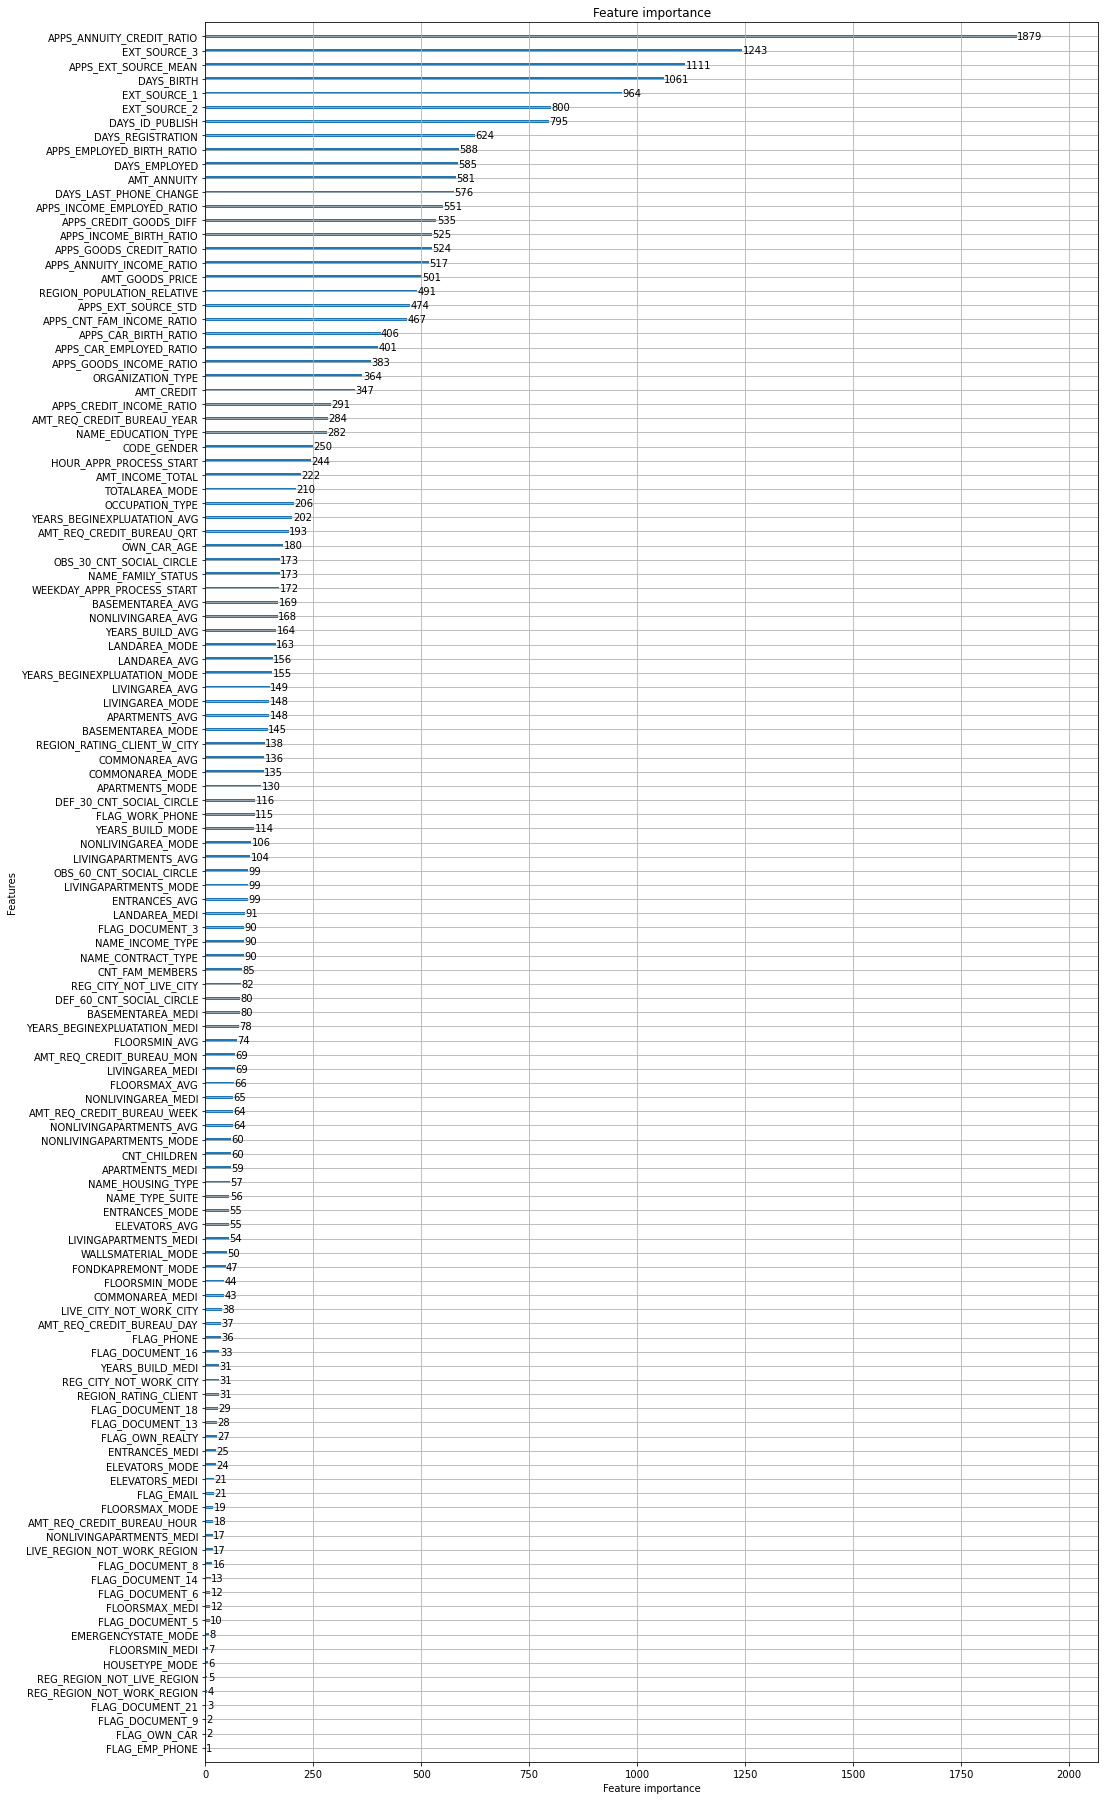

In [ ]:
# feature importance
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

#### 학습된 Classifier를 이용하여 테스트 데이터 예측하고 결과를 Kaggle로 Submit 수행. 
* 반드시 **학습용피처의 갯수와 테스트용 피처의 갯수가 맞아야 한다.**

In [ ]:
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR', 'TARGET'], axis = 1))[:, 1]
apps_test['TARGET'] = preds

##### 코랩 버전은 Google Drive로 예측 결과 CSV를 생성.

In [ ]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# SK_ID_CURR과 TARGET 값만 csv 형태로 생성. 코랩 버전은 구글 드라이브 절대 경로로 입력  
default_dir = "/content/gdrive/My Drive"
apps_test[['SK_ID_CURR', 'TARGET']].to_csv(os.path.join(default_dir,'apps_baseline_02_01.csv'), index=False)

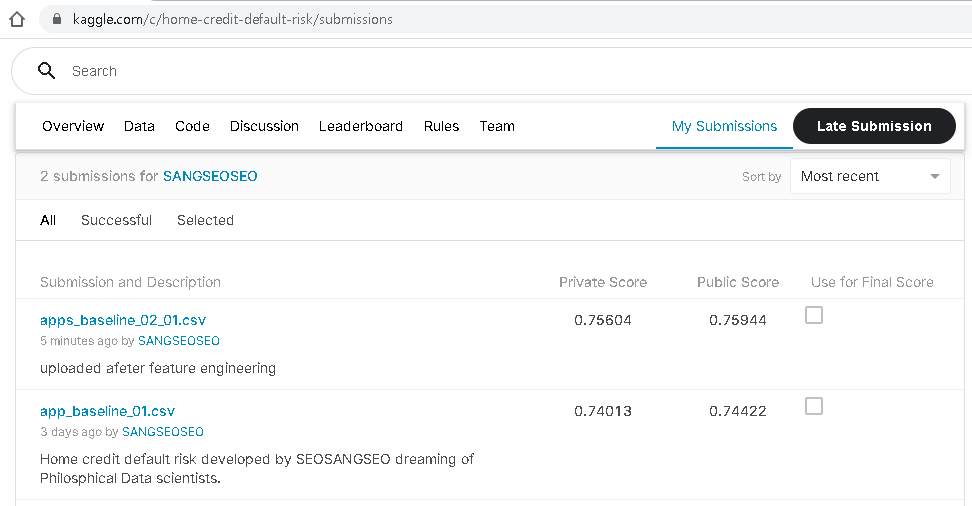

In [ ]:
from IPython.display import Image
Image("/content/gdrive/MyDrive/Kaggle_submission_20210222.PNG")